In [8]:
import pandas as pd
import sweetviz as sv
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns

In [2]:
data = pd.read_csv('../Datasets/telecommunications_churn.csv',sep=';')
data.head()

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn
0,128,1,25,265.1,197.4,244.7,10.0,1,0,110,45.07,99,16.78,91,11.01,3,2.70,75.56,0
1,107,1,26,161.6,195.5,254.4,13.7,1,0,123,27.47,103,16.62,103,11.45,3,3.70,59.24,0
2,137,0,0,243.4,121.2,162.6,12.2,0,0,114,41.38,110,10.30,104,7.32,5,3.29,62.29,0
3,84,0,0,299.4,61.9,196.9,6.6,2,1,71,50.90,88,5.26,89,8.86,7,1.78,66.80,0
4,75,0,0,166.7,148.3,186.9,10.1,3,1,113,28.34,122,12.61,121,8.41,3,2.73,52.09,0


### Checking multicolinearity using correlation and heatmap

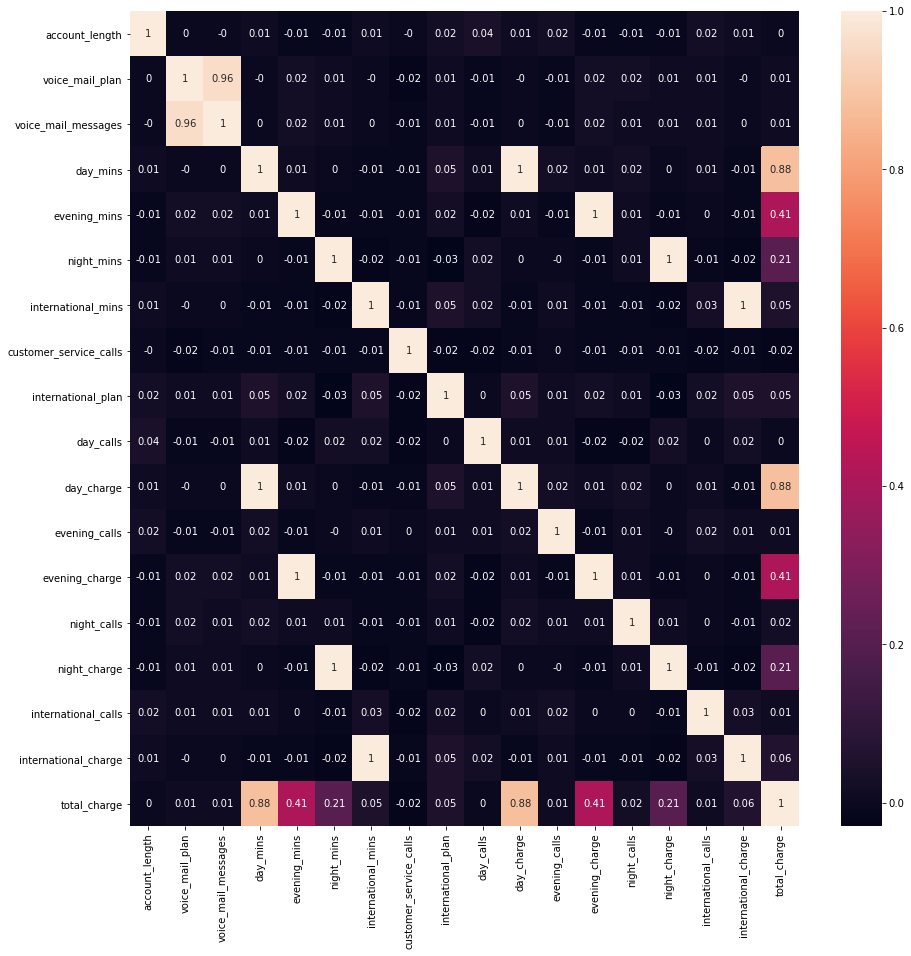

In [11]:
plt.figure(figsize=(15,15))
sns.heatmap(round(data.iloc[:,:-1].corr(),2),annot=True)
plt.show()

### There seems to be multicolinearity in the data, Lets confirm the same using VIF

In [4]:
#calculating VIF of each independent variables against all other independent variable
#variance inflation factor

def cal_VIF(X):
    
    vif = pd.DataFrame()
    vif['variables'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
    
    return vif

##calling cal_VIF function with using only the predictor
# using original data fro VIF calculation
print(cal_VIF(data.iloc[:,:-1]))

#all the VIF values are <5 which is acceptable

                 variables           VIF
0           account_length  7.197958e+00
1          voice_mail_plan  1.645595e+01
2      voice_mail_messages  1.607146e+01
3                 day_mins  1.246201e+08
4             evening_mins  3.738593e+07
5               night_mins  1.071873e+07
6       international_mins  9.980961e+05
7   customer_service_calls  2.377890e+00
8       international_plan  1.116301e+00
9                day_calls  2.178360e+01
10              day_charge           inf
11           evening_calls  2.198522e+01
12          evening_charge           inf
13             night_calls  2.227654e+01
14            night_charge           inf
15     international_calls  4.254404e+00
16    international_charge           inf
17            total_charge           inf


/Users/vp054179/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [5]:
#removing day_charge evening_charge night_charge international_charge
data_new = data.drop(labels=['day_charge','evening_charge','night_charge','international_charge'],axis=1)
print(cal_VIF(data_new.iloc[:,:-1]))
#now VIF are in acceptable range


                 variables           VIF
0           account_length  7.195221e+00
1          voice_mail_plan  1.645019e+01
2      voice_mail_messages  1.606177e+01
3                 day_mins  3.164567e+07
4             evening_mins  9.633552e+06
5               night_mins  2.696537e+06
6       international_mins  2.546851e+05
7   customer_service_calls  2.377436e+00
8       international_plan  1.115481e+00
9                day_calls  2.176489e+01
10           evening_calls  2.196817e+01
11             night_calls  2.226289e+01
12     international_calls  4.252372e+00
13            total_charge  1.131036e+08


In [ ]:
## Now this new dataset can be used for model building